In [105]:
import sys

sys.path.append("..")
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
from src.utils import *

# 環境変数を設定
os.environ["OPENBLAS_NUM_THREADS"] = "1"

# ２次元正方格子ハバード模型
- $10\times10$サイト
- ハーフフィリング
- $t = 1$, $U = 4$

In [106]:
%%bash
mpirun --allow-run-as-root  -n 12 python mpi_afqmc.py

beta: beta: 0 i_mc: 0 rank: 1
beta: 0 i_mc: 0 rank: 2
beta: 0 i_mc: 0 rank: 3
beta: 0 i_mc: 0 rank: 5
beta: 0 i_mc: 0 rank: 6
beta: 0 i_mc: 0 rank: 9
beta: 0 i_mc: 0 rank: 11
0 i_mc: 0 rank: 0
beta:beta: 0 i_mc: 0 rank: 10
beta: 0 i_mc: 0 rank: 8
 0 i_mc: 0 rank: 7
beta: 0 i_mc: 0 rank: 4
beta: 0 i_mc: 1 rank: 6
beta: 0 i_mc: 1 rank: 9
beta: 0 i_mc: 1 rank: 2
beta: 0 i_mc: 1 rank: 3
beta: 0 i_mc: beta: 0 i_mc: 1 rank: 5
1 rank: 11
beta: 0 i_mc: 1 rank: 1
beta: 0 i_mc: 1 rank: 0
beta:beta: 0 i_mc: 2 rank: 2
 0 i_mc: 2 rank: 6
beta: 0 i_mc: beta:2 rank: 3
 0 i_mc: 2 rank: 9
beta: 0 i_mc: 2 rank: 5
beta: 0 i_mc: 2 rank: 11
beta: 0 i_mc: 2 rank: 0
beta: 0 i_mc: 2 rank: 1
beta: 0 i_mc: 1 rank: 8
beta: 0 i_mc: 1 rank: 10
beta: 0 i_mc: 1 rank: 7
beta: 0 i_mc: 1 rank: 4
beta: 0 i_mc: 3 rank: 2
beta: 0 i_mc: 3beta: rank: 9
 0 i_mc: 3 rank: 6
beta: 0 i_mc: 3 rank: 3
beta: 0 i_mc: 3 rank: 11
beta: 0 i_mc: 3 rank: 0
beta: 0 i_mc: 3 rank: 5
beta: 0 i_mc: 3 rank: 1
beta: 0 i_mc: 4 rank: 6
beta: 0 i_

In [107]:
SzSz_beta = []
with h5py.File("./data/results.h5", "r") as f:
    for beta in range(6):
        SzSz_beta.append(f[f"/beta={beta}/SzSz"][:])

## 実空間上の磁気相関関数

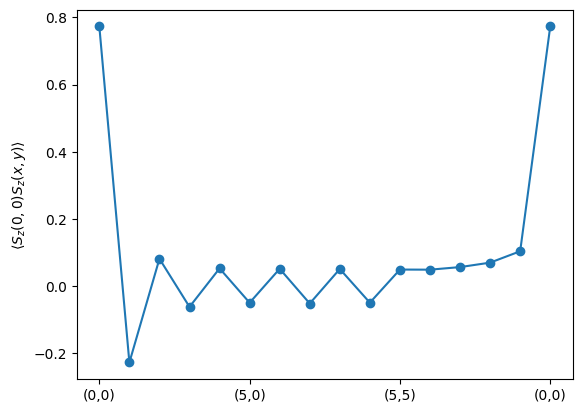

In [108]:
Szz_on_path = (
    [SzSz_beta[5][x, 0] for x in range(5)]
    + [SzSz_beta[5][5, y] for y in range(5)]
    + [SzSz_beta[5][xy, xy] for xy in reversed(range(6))]
)
fig, ax = plt.subplots()
ax.set_xticks([0, 5, 10, 15])
ax.set_xticklabels(["(0,0)", "(5,0)", "(5,5)", "(0,0)"])
ax.set_ylabel(r"$\langle S_z(0,0)S_z(x,y)\rangle$")
ax.plot(Szz_on_path, marker="o")

In [109]:
N = 10
k_path = (
    [(np.pi * ikx / N, 0) for ikx in range(N)]
    + [(np.pi, np.pi * ikx / N) for ikx in range(N)]
    + [(np.pi * ikxy / N, np.pi * ikxy / N) for ikxy in reversed(range(N + 1))]
)

SzSz_k_on_path = [r2k(SzSz_beta[5], kx, ky) for kx, ky in k_path]

## 磁気構造因子

/root/.pyenv/versions/3.11.5/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '$S(q_x, q_y)$')

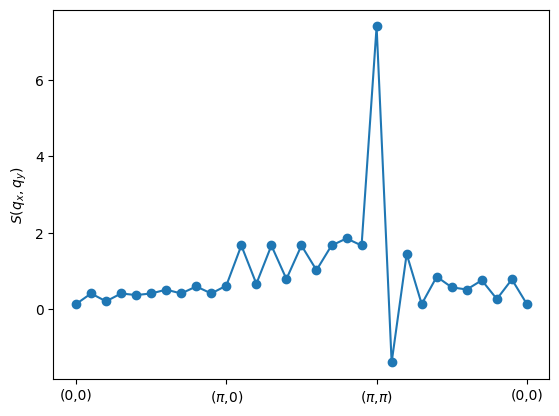

In [110]:
fig, ax = plt.subplots()
ax.plot(SzSz_k_on_path, marker="o")
ax.set_xticks([0, 10, 20, 30])
ax.set_xticklabels(["(0,0)", "($\pi$,0)", "($\pi$,$\pi$)", "(0,0)"])
ax.set_ylabel(r"$S(q_x, q_y)$")

In [111]:
SzSz_pipi_beta = []
for beta in range(6):
    SzSz_pipi_beta.append(r2k(SzSz_beta[beta], np.pi, np.pi))

## 反強磁性構造因子$S(\pi, \pi)$の逆温度依存性

Text(0, 0.5, '$S(\\pi, \\pi)$')

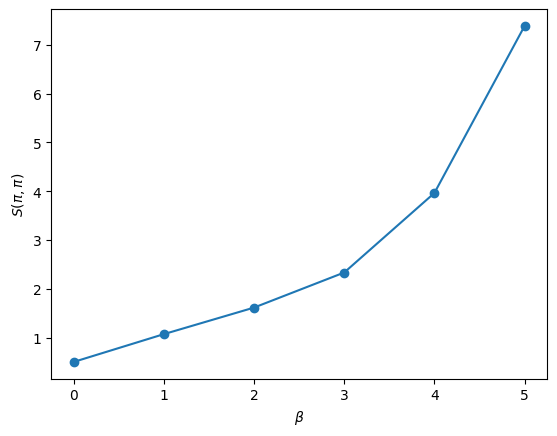

In [112]:
fig, ax = plt.subplots()
ax.plot(SzSz_pipi_beta, marker="o")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$S(\pi, \pi)$")

In [113]:
SzSz_pipi_beta_rank = []
for rank in range(12):
    SzSz_pipi_beta_ranki = []
    with h5py.File(f"./data/results_rank{rank}.h5", "r") as f:
        for beta in range(6):
            SzSz_pipi_beta_ranki.append(
                np.real(r2k(f[f"/beta={beta}/SzSz"][:], np.pi, np.pi))
            )
    SzSz_pipi_beta_rank.append(SzSz_pipi_beta_ranki)

## MPIのプロセスごとの反強磁性構造因子の逆温度依存性

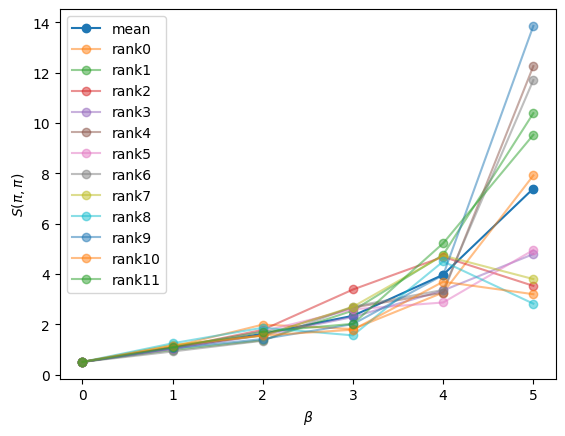

In [114]:
fig, ax = plt.subplots()
ax.plot(SzSz_pipi_beta, marker="o", label="mean")
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$S(\pi, \pi)$")
for rank in range(12):
    ax.plot(SzSz_pipi_beta_rank[rank], marker="o", label=f"rank{rank}", alpha=0.5)
ax.legend()